In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
file_path = '/content/drive/MyDrive/Kopis/국뮤/국뮤_2023_병합_4.xlsx'
mix_df_2 = pd.read_excel(file_path)

In [4]:
file_path = '/content/drive/MyDrive/Kopis/국악/국악_2023_병합_4.xlsx'
korean_df_2 = pd.read_excel(file_path)

In [5]:
file_path = '/content/drive/MyDrive/Kopis/뮤지컬/뮤지컬_2023_병합_4.xlsx'
musical_df_2 = pd.read_excel(file_path)

In [27]:
mix_df_2['장르명'] = '국악뮤지컬'
korean_df_2['장르명'] = '국악'
musical_df_2['장르명'] = '뮤지컬'

In [28]:
combined_df = pd.concat([mix_df_2, korean_df_2, musical_df_2], ignore_index=True)
combined_df = combined_df[combined_df['성별'] != 0].dropna()

In [29]:
# 사용할 변수 선택
selected_columns = ['좌석수', '공연코드', '예매/취소구분', '할인금액', '장당금액', '성별',
                    '소요시간', '판매좌석수', '시설특성_코드', '나이', '나이_구분',
                    '공연지역_구분', '분기', '공연일수', '수상실적횟수', '규모', '장르명']

# 선택된 데이터를 추출
selected_df = combined_df[selected_columns]

# 공연코드 칼럼에 따라 정렬
selected_df = selected_df.sort_values(by='공연코드').reset_index(drop=True)

In [30]:
# selected_df를 공연코드로 그룹화
grouped = selected_df.groupby('공연코드')

# new_df 생성
new_df = pd.DataFrame()

# 동일한 값이 있는 칼럼들 복사
new_df['공연코드'] = grouped['공연코드'].first()
new_df['규모'] = grouped['규모'].first()
new_df['수상실적횟수'] = grouped['수상실적횟수'].first()
new_df['분기'] = grouped['분기'].first()
new_df['소요시간'] = grouped['소요시간'].first()
new_df['시설특성_코드'] = grouped['시설특성_코드'].first()
new_df['공연지역_구분'] = grouped['공연지역_구분'].first()
new_df['공연일수'] = grouped['공연일수'].first()
new_df['장르명'] = grouped['장르명'].first()

# 판매_비율: 판매좌석수 합 / 좌석수 합
new_df['판매_비율'] = grouped['판매좌석수'].sum() / grouped['좌석수'].sum()

# 성별_비율: 성별이 1인 행의 수 / 전체 행의 수
new_df['성별_비율'] = grouped['성별'].mean()

# 나이_평균: 나이의 평균
new_df['나이_평균'] = grouped['나이'].mean()

# 나이_구분_최빈값: 나이_구분의 최빈값
new_df['나이_구분_최빈값'] = grouped['나이_구분'].agg(lambda x: x.value_counts().idxmax())

# 장당금액_평균: 예매/취소구분이 1인 행들의 장당금액 평균
new_df['장당금액_평균'] = grouped.apply(lambda x: x[x['예매/취소구분'] == 1]['장당금액'].mean())

# 할인금액_평균: 예매/취소구분이 1인 행들의 할인금액 평균
new_df['할인금액_평균'] = grouped.apply(lambda x: x[x['예매/취소구분'] == 1]['할인금액'].mean())

# 취소_비율: 예매/취소구분이 2인 행의 수 / 예매/취소구분이 1인 행의 수
new_df['취소_비율'] = grouped.apply(lambda x: len(x[x['예매/취소구분'] == 2]) / len(x[x['예매/취소구분'] == 1]) if len(x[x['예매/취소구분'] == 1]) > 0 else -1)

# 결과 확인
new_df = new_df[new_df['취소_비율']!=-1]
new_df.replace([np.inf, -np.inf], np.nan, inplace=True)
new_df = new_df.dropna()

new_df

,공연코드,규모,수상실적횟수,분기,소요시간,시설특성_코드,공연지역_구분,공연일수,장르명,판매_비율,성별_비율,나이_평균,나이_구분_최빈값,장당금액_평균,할인금액_평균,취소_비율
공연코드,,,,,,,,,,,,,,,,
PF421016,PF421016,대극장,0,1,150,0,비수도권,85,뮤지컬,0.740232,1.801732,38.368831,30대_중반,149033.928571,1379.166667,0.375000
PF421023,PF421023,중극장,0,1,60,3,비수도권,0,국악,0.969627,1.888889,45.227778,40대_중반,14911.184211,3434.210526,0.184211
PF421037,PF421037,소극장,0,1,90,4,수도권,1,국악,1.018182,1.772727,46.363636,40대_초반,12210.526316,7789.473684,0.157895
PF421065,PF421065,대극장,0,2,110,3,비수도권,0,국악,0.842567,1.647328,44.035115,30대_초반,109275.220372,0.000000,0.283056
PF421093,PF421093,소극장,0,1,60,1,수도권,0,국악,0.562870,1.647887,40.042254,40대_후반,8296.296296,0.000000,0.314815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PF454758,PF454758,소극장,0,4,60,0,수도권,0,국악,0.817617,1.565217,40.565217,30대_중반,20000.000000,1363.636364,0.045455
PF454764,PF454764,소극장,0,4,60,0,수도권,11,국악,0.351152,1.645161,45.000000,50대_중반,27000.000000,0.000000,0.291667
PF454811,PF454811,중극장,0,4,70,1,수도권,0,국악,0.166667,1.681818,40.000000,30대_초반,16363.636364,454.545455,0.000000


In [31]:
selected_df = new_df.drop(columns=['공연코드', '장르명'])

# 범주형 변수를 숫자로 변환 (One-Hot Encoding)
selected_df = pd.get_dummies(selected_df, columns=['규모', '분기', '시설특성_코드', '공연지역_구분', '나이_구분_최빈값'])

# 수치형 데이터에 대해 정규화 적용
scaler = StandardScaler()
data_selected_scaled = scaler.fit_transform(selected_df)

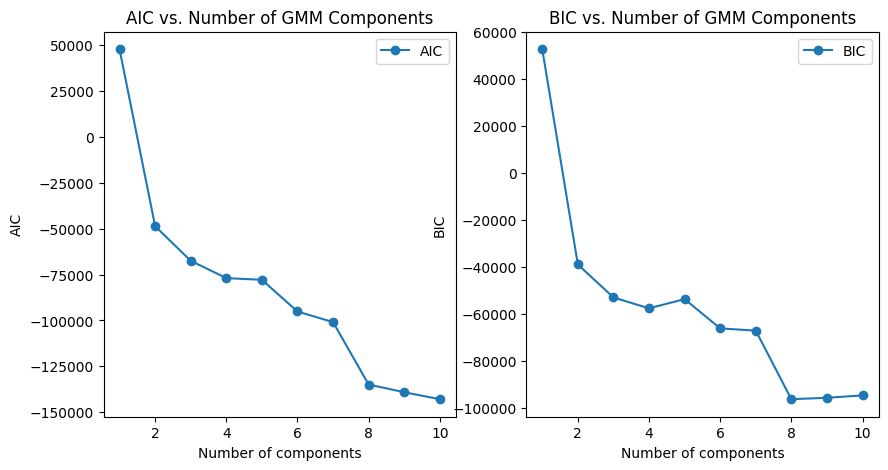

In [32]:
# 클러스터 수에 따른 AIC와 BIC 값을 저장할 리스트
aic = []
bic = []

# 클러스터 수를 1부터 10까지 변화시키며 GMM을 적용
n_components_range = range(1, 11)
for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(data_selected_scaled)

    # 각 클러스터 수에 대한 AIC와 BIC 값을 저장
    aic.append(gmm.aic(data_selected_scaled))
    bic.append(gmm.bic(data_selected_scaled))

# AIC와 BIC 그래프 그리기
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(n_components_range, aic, marker='o', label='AIC')
plt.xlabel('Number of components')
plt.ylabel('AIC')
plt.title('AIC vs. Number of GMM Components')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(n_components_range, bic, marker='o', label='BIC')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('BIC vs. Number of GMM Components')
plt.legend()

plt.show()

In [33]:
# GMM 모델 초기화 및 학습
gmm8 = GaussianMixture(n_components=8, random_state=44)  # n_components는 클러스터의 수를 의미
gmm8.fit(data_selected_scaled)

# 클러스터 레이블 할당
cluster_labels8 = gmm8.predict(data_selected_scaled)

# 원본 데이터프레임에 클러스터 레이블 추가
selected_df['Cluster8'] = cluster_labels8

# 클러스터별 데이터 개수 확인
print(selected_df['Cluster8'].value_counts())

Cluster8
1    254
6    150
4    116
5    115
0    111
2     99
3     73
7     46
Name: count, dtype: int64


In [34]:
# 'combined_df'의 '장르명' 열을 'selected_df'에 추가
selected_df['장르명'] = new_df['장르명']
selected_df['공연코드'] = new_df['공연코드']

selected_df = pd.get_dummies(selected_df, columns=['장르명'])

selected_df['장르명'] = new_df['장르명']

In [35]:
pd.set_option('display.max_columns', None)
selected_df

,수상실적횟수,소요시간,공연일수,판매_비율,성별_비율,나이_평균,장당금액_평균,할인금액_평균,취소_비율,규모_대극장,규모_소극장,규모_중극장,분기_1,분기_2,분기_3,분기_4,시설특성_코드_0,시설특성_코드_1,시설특성_코드_2,시설특성_코드_3,시설특성_코드_4,시설특성_코드_5,공연지역_구분_비수도권,공연지역_구분_수도권,나이_구분_최빈값_10대_중반,나이_구분_최빈값_10대_초반,나이_구분_최빈값_10대_후반,나이_구분_최빈값_20대_중반,나이_구분_최빈값_20대_초반,나이_구분_최빈값_20대_후반,나이_구분_최빈값_30대_중반,나이_구분_최빈값_30대_초반,나이_구분_최빈값_30대_후반,나이_구분_최빈값_40대_중반,나이_구분_최빈값_40대_초반,나이_구분_최빈값_40대_후반,나이_구분_최빈값_50대_중반,나이_구분_최빈값_50대_초반,나이_구분_최빈값_50대_후반,나이_구분_최빈값_60대_중반,나이_구분_최빈값_60대_초반,나이_구분_최빈값_60대_후반,나이_구분_최빈값_70대_초반,Cluster8,공연코드,장르명_국악,장르명_국악뮤지컬,장르명_뮤지컬,장르명
공연코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PF421016,0,150,85,0.740232,1.801732,38.368831,149033.928571,1379.166667,0.375000,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,2,PF421016,False,False,True,뮤지컬
PF421023,0,60,0,0.969627,1.888889,45.227778,14911.184211,3434.210526,0.184211,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,1,PF421023,True,False,False,국악
PF421037,0,90,1,1.018182,1.772727,46.363636,12210.526316,7789.473684,0.157895,False,True,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,6,PF421037,True,False,False,국악
PF421065,0,110,0,0.842567,1.647328,44.035115,109275.220372,0.000000,0.283056,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,7,PF421065,True,False,False,국악
PF421093,0,60,0,0.562870,1.647887,40.042254,8296.296296,0.000000,0.314815,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,3,PF421093,True,False,False,국악
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PF454758,0,60,0,0.817617,1.565217,40.565217,20000.000000,1363.636364,0.045455,False,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,2,PF454758,True,False,False,국악
PF454764,0,60,11,0.351152,1.645161,45.000000,27000.000000,0.000000,0.291667,False,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4,PF454764,True,False,False,국악
PF454811,0,70,0,0.166667,1.681818,40.000000,16363.636364,454.545455,0.000000,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,0,PF454811,True,False,False,국악


In [37]:
# 군집별 주요 수치형 변수의 통계 요약 (평균 및 표준편차)
cluster_summary = selected_df.groupby('Cluster8').agg({
    '수상실적횟수': ['mean', 'std'],
    '소요시간': ['mean', 'std'],
    '공연일수': ['mean', 'std'],
    '판매_비율': ['mean', 'std'],
    '성별_비율': ['mean', 'std'],
    '나이_평균': ['mean', 'std'],
    '장당금액_평균': ['mean', 'std'],
    '할인금액_평균': ['mean', 'std'],
    '취소_비율': ['mean', 'std']
}).reset_index()

# 군집별 주요 범주형 변수의 분포 요약
categorical_summary = selected_df.groupby('Cluster8').agg({
    '규모_대극장': 'mean',
    '규모_소극장': 'mean',
    '규모_중극장': 'mean',
    '분기_1': 'mean',
    '분기_2': 'mean',
    '분기_3': 'mean',
    '분기_4': 'mean',
    '시설특성_코드_0': 'mean',
    '시설특성_코드_1': 'mean',
    '시설특성_코드_2': 'mean',
    '시설특성_코드_3': 'mean',
    '시설특성_코드_4': 'mean',
    '시설특성_코드_5': 'mean',
    '공연지역_구분_비수도권': 'mean',
    '공연지역_구분_수도권': 'mean',
    '나이_구분_최빈값_10대_중반': 'mean',
    '나이_구분_최빈값_10대_후반': 'mean',
    '나이_구분_최빈값_20대_초반': 'mean',
    '나이_구분_최빈값_20대_중반': 'mean',
    '나이_구분_최빈값_20대_후반': 'mean',
    '나이_구분_최빈값_30대_초반': 'mean',
    '나이_구분_최빈값_30대_중반': 'mean',
    '나이_구분_최빈값_30대_후반': 'mean',
    '나이_구분_최빈값_40대_초반': 'mean',
    '나이_구분_최빈값_40대_중반': 'mean',
    '나이_구분_최빈값_40대_후반': 'mean',
    '나이_구분_최빈값_50대_초반': 'mean',
    '나이_구분_최빈값_50대_중반': 'mean',
    '나이_구분_최빈값_50대_후반': 'mean',
    '나이_구분_최빈값_60대_초반': 'mean',
    '나이_구분_최빈값_60대_중반': 'mean',
    '나이_구분_최빈값_60대_후반': 'mean',
    '나이_구분_최빈값_70대_초반': 'mean',
    '장르명_국악': 'mean',
    '장르명_국악뮤지컬': 'mean',
    '장르명_뮤지컬': 'mean'
}).reset_index()

cluster_summary, categorical_summary

(  Cluster8    수상실적횟수                  소요시간                  공연일수             \
                 mean       std        mean        std       mean        std   
 0        0  0.000000  0.000000   76.531532  33.171680   1.279279   5.315793   
 1        1  0.000000  0.000000   87.716535  29.617161   0.366142   0.886769   
 2        2  0.000000  0.000000   92.585859  60.890837   6.131313  20.733807   
 3        3  0.000000  0.000000   89.863014  48.854749   9.219178  43.571858   
 4        4  0.000000  0.000000   54.094828  38.648917   1.956897  12.715203   
 5        5  0.008696  0.093250   78.721739  36.591761   3.817391  24.351801   
 6        6  0.000000  0.000000   88.000000  38.202041  33.666667  73.323652   
 7        7  1.543478  3.544677  153.586957  62.899064  30.891304  38.167600   
 
       판매_비율               성별_비율                나이_평균                  장당금액_평균  \
        mean       std      mean       std       mean       std           mean   
 0  0.683641  0.419109  1.720569  

In [38]:
print(selected_df[selected_df['Cluster8'] == 0]['장르명'].value_counts())
print(selected_df[selected_df['Cluster8'] == 1]['장르명'].value_counts())
print(selected_df[selected_df['Cluster8'] == 2]['장르명'].value_counts())
print(selected_df[selected_df['Cluster8'] == 3]['장르명'].value_counts())
print(selected_df[selected_df['Cluster8'] == 4]['장르명'].value_counts())
print(selected_df[selected_df['Cluster8'] == 5]['장르명'].value_counts())
print(selected_df[selected_df['Cluster8'] == 6]['장르명'].value_counts())
print(selected_df[selected_df['Cluster8'] == 7]['장르명'].value_counts())

장르명
국악     105
뮤지컬      6
Name: count, dtype: int64
장르명
국악       192
뮤지컬       60
국악뮤지컬      2
Name: count, dtype: int64
장르명
국악       79
뮤지컬      19
국악뮤지컬     1
Name: count, dtype: int64
장르명
국악     61
뮤지컬    12
Name: count, dtype: int64
장르명
국악     104
뮤지컬     12
Name: count, dtype: int64
장르명
국악     94
뮤지컬    21
Name: count, dtype: int64
장르명
국악       97
뮤지컬      49
국악뮤지컬     4
Name: count, dtype: int64
장르명
뮤지컬    40
국악      6
Name: count, dtype: int64


# **결론**

Cluster 0은 짧은 공연 기간과 저렴한 가격대의 공연으로, 주로 여성 중년층을 대상으로 합니다. 수도권의 소극장에서 열리며, 안정적인 판매율을 보입니다.

Cluster 1은 비수도권의 중극장에서 열리는 중저가의 공연으로, 주로 중년층 여성 관객을 대상으로 합니다. 공연 기간이 짧고, 좌석 판매율이 낮은 편입니다.

Cluster 2는 중고가의 공연으로, 수도권 및 비수도권에서 중극장과 소극장에서 주로 열립니다. 중년층 여성 관객이 많으며, 공연 기간이 길고 좌석 판매율이 높습니다.

Cluster 3는 중가의 공연으로, 중년층 여성 관객을 대상으로 하며, 비수도권의 중극장에서 주로 열립니다. 공연 기간이 비교적 길고 좌석 판매율이 중간 정도입니다.

Cluster 4는 저가의 짧은 공연으로, 수도권의 소극장에서 열리며, 주로 젊은층 여성 관객을 대상으로 합니다. 좌석 판매율이 매우 높으며, 취소율이 낮습니다.

Cluster 5는 비수도권의 중극장에서 열리는 저가의 공연으로, 중년층 여성 관객을 대상으로 합니다. 좌석 판매율이 낮고, 공연 기간이 비교적 짧습니다.

Cluster 6은 수도권의 중극장과 소극장에서 열리는 중고가의 공연으로, 여성 관객이 많으며 공연 기간이 매우 깁니다. 좌석 판매율이 높지만 취소율도 비교적 높습니다.

Cluster 7은 수도권의 대극장에서 열리는 매우 고가의 공연으로, 공연 기간이 길고 여성 중년층 관객을 대상으로 합니다. 좌석 판매율이 중간 정도이며, 취소율이 매우 높은 것이 특징입니다.